In [1]:
import sys
sys.path.append("..")

Auto reload the packages when they are modified.

In [2]:
# for auto-reload
%load_ext autoreload
%aimport predictions.models
%aimport agents
%autoreload 1

## Import Required Libraries

In [3]:
from agents.des_agent import DESAgent as Agent
from predictions.models.des import DES

import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

2024-03-02 13:54:12.687289: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-02 13:54:12.688904: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-02 13:54:12.710985: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-02 13:54:12.711011: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-02 13:54:12.711671: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [4]:
df = pd.read_csv('../../data/bitcoin/price/bitcoin_chart.csv')
df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
df = df[(df['Date'] >= datetime.strptime('2022-01-01', '%Y-%m-%d').date()) & (df['Date'] < datetime.strptime('2023-01-01', '%Y-%m-%d').date())]
df

,Timestamp,Price,Market_Cap,Total_Volume,Date
3168,2022-01-01 00:00:00.000,46319.651088,8.761929e+11,2.589535e+10,2022-01-01
3169,2022-01-02 00:00:00.000,47816.077676,9.045519e+11,1.890459e+10,2022-01-02
3170,2022-01-03 00:00:00.000,47387.212168,8.975361e+11,3.375613e+10,2022-01-03
3171,2022-01-04 00:00:00.000,46531.140861,8.803302e+11,2.189002e+10,2022-01-04
3172,2022-01-05 00:00:00.000,45938.024272,8.762427e+11,2.489599e+10,2022-01-05
...,...,...,...,...,...
3528,2022-12-27 00:00:00.000,16900.081872,3.250369e+11,1.257500e+10,2022-12-27
3529,2022-12-28 00:00:00.000,16701.840211,3.213515e+11,1.743606e+10,2022-12-28
3530,2022-12-29 00:00:00.000,16538.906094,3.182889e+11,1.911361e+10,2022-12-29
3531,2022-12-30 00:00:00.000,16644.379087,3.202973e+11,1.568373e+10,2022-12-30


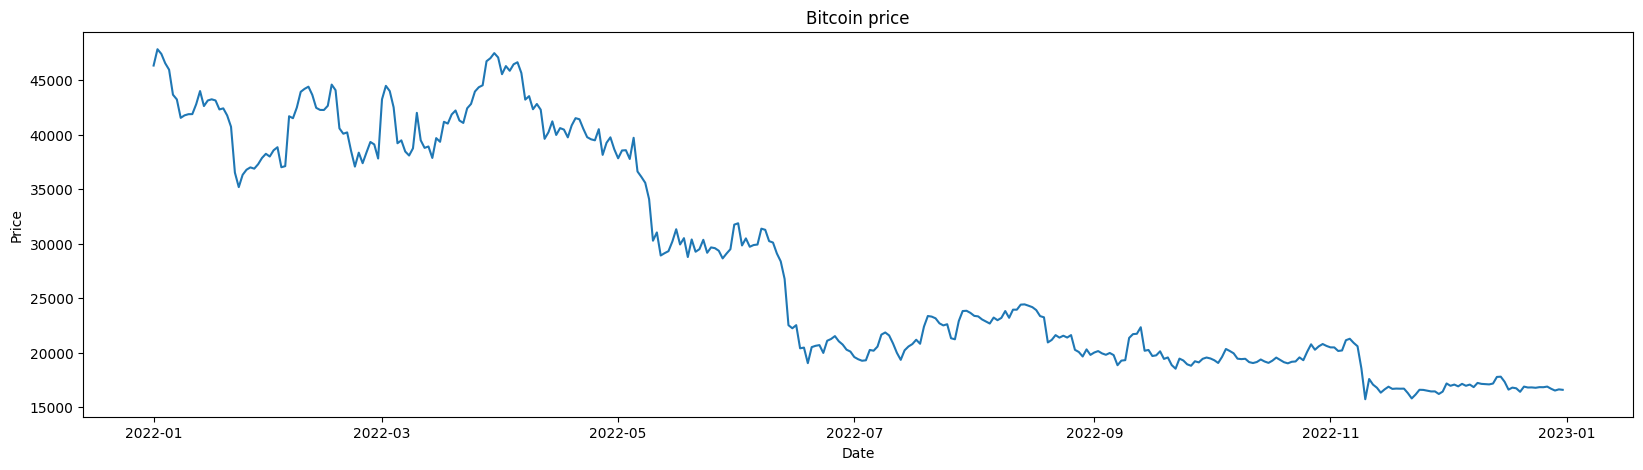

In [5]:
# plot the df with the price and the date
plt.figure(figsize=(20, 5))
plt.plot(df['Date'], df['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin price')
plt.show()

In [6]:
data_points = df["Price"].values.tolist()
window_size = 30
skip = 1

In [10]:
model = DES(window_size, 500, 3)
agent = Agent(model, 100, 5, 5, data_points, window_size, skip)
# agent.train_test_split()
agent.fit(500, 10)

iter 10. reward: 96.410420
iter 20. reward: 119.165845
iter 30. reward: 113.839648
iter 40. reward: 163.962809
iter 50. reward: 212.809244
iter 60. reward: 217.401026
iter 70. reward: 245.581082
iter 80. reward: 293.420361
iter 90. reward: 293.321158
iter 100. reward: 263.852682
iter 110. reward: 300.883300
iter 120. reward: 265.602657
iter 130. reward: 308.714540
iter 140. reward: 331.241124
iter 150. reward: 339.828501
iter 160. reward: 378.967570
iter 170. reward: 400.229563
iter 180. reward: 368.376801
iter 190. reward: 426.352360
iter 200. reward: 438.324172
iter 210. reward: 446.212515
iter 220. reward: 399.794471
iter 230. reward: 471.684782
iter 240. reward: 504.918784
iter 250. reward: 519.673584
iter 260. reward: 461.834990
iter 270. reward: 469.738329
iter 280. reward: 465.047331
iter 290. reward: 503.548793
iter 300. reward: 541.081887
iter 310. reward: 509.163175
iter 320. reward: 565.844877
iter 330. reward: 505.902337
iter 340. reward: 523.143792
iter 350. reward: 556.82

day 0: buy 0.001943 units at price 90.000000, total balance 10.000000
day 1, sell 0.001943 units at price 92.907587, investment 3.230652 %, total balance 102.907587,
day 8: buy 0.002218 units at price 92.616828, total balance 10.290759
day 9: buy 0.000221 units at price 9.261683, total balance 1.029076
day 10: buy 0.000002 units at price 0.102908, total balance 0.926168
day 11: buy 0.000019 units at price 0.833551, total balance 0.092617
day 12, sell 0.002461 units at price 108.248115, investment 16.877373 %, total balance 108.340732,
day 13: buy 0.002288 units at price 97.506659, total balance 10.834073
day 14: buy 0.000226 units at price 9.750666, total balance 1.083407
day 15, sell 0.002515 units at price 108.696052, investment 1073.610176 %, total balance 109.779459,
day 16: buy 0.002291 units at price 98.801513, total balance 10.977946
day 17, sell 0.002291 units at price 96.919301, investment 94080.909334 %, total balance 107.897247,
day 18: buy 0.000255 units at price 10.789725,

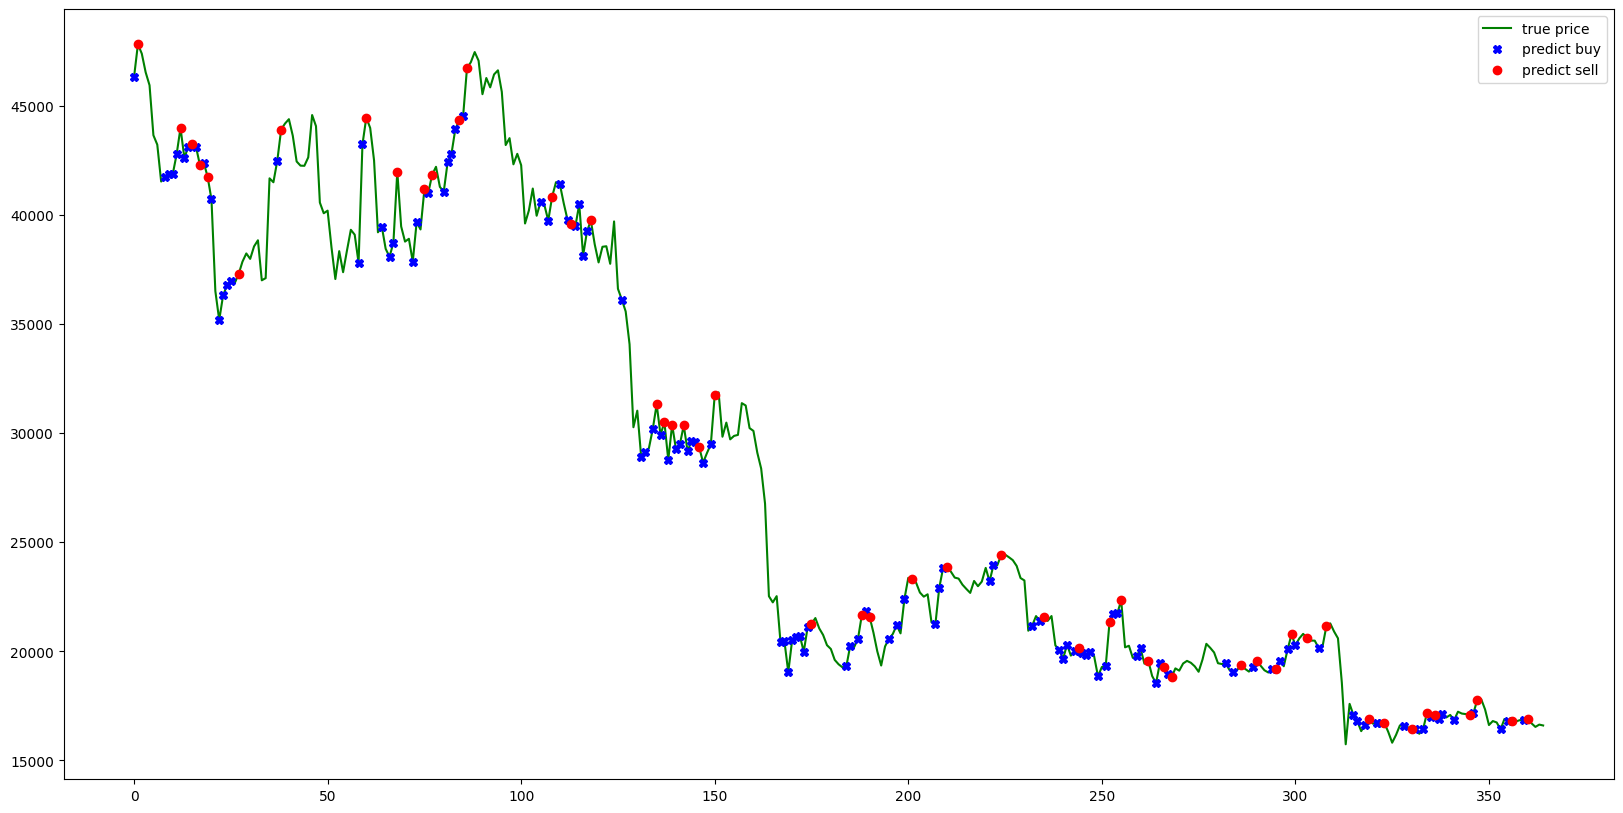

In [11]:
agent.buy()